## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

To display all columns of the data frame

In [2]:
pd.set_option("display.max_columns",None)

Importing the dataset

In [3]:
df=pd.read_csv("campaign_data.csv")
df.drop_duplicates(inplace=True)
df.shape

(39404, 20)

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39404 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             39404 non-null  int64  
 1   job             39404 non-null  object 
 2   marital         39404 non-null  object 
 3   education       39404 non-null  object 
 4   default         39404 non-null  object 
 5   housing         39404 non-null  object 
 6   loan            39404 non-null  object 
 7   contact         39404 non-null  object 
 8   month           39404 non-null  object 
 9   day_of_week     39404 non-null  object 
 10  campaign        39404 non-null  int64  
 11  pdays           39404 non-null  int64  
 12  previous        39404 non-null  int64  
 13  poutcome        39404 non-null  object 
 14  emp.var.rate    39404 non-null  float64
 15  cons.price.idx  39404 non-null  float64
 16  cons.conf.idx   39404 non-null  float64
 17  euribor3m       39404 non-null 

In [6]:
df["y"].value_counts()

no     34806
yes     4598
Name: y, dtype: int64

Output variable has two classes. If you see the counts of two classes we can say that data is imbalanced

To check for the missing values

In [7]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

So there are no missing values

### visualizing each feature

In [8]:
feature_column=df.dtypes[df.dtypes == 'int64'].index | df.dtypes[df.dtypes == 'float64'].index

<ipython-input-8-f961fea8ae1f>:1: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  feature_column=df.dtypes[df.dtypes == 'int64'].index | df.dtypes[df.dtypes == 'float64'].index


C:\Users\RAMESH MISALE\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\RAMESH MISALE\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\RAMESH MISALE\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

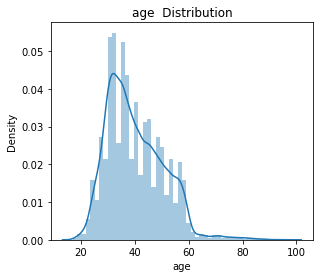

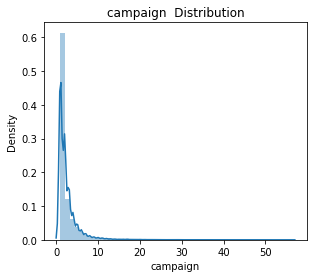

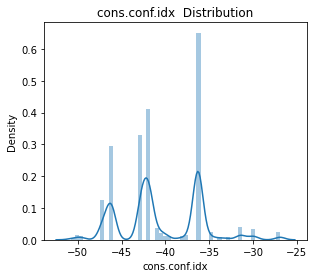

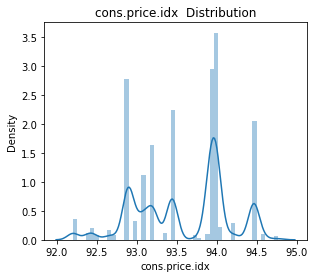

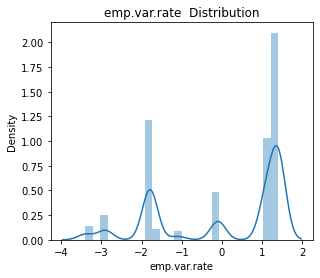

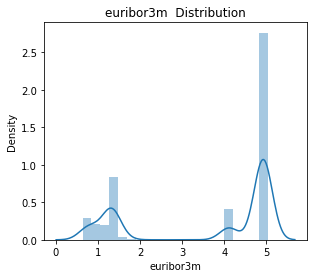

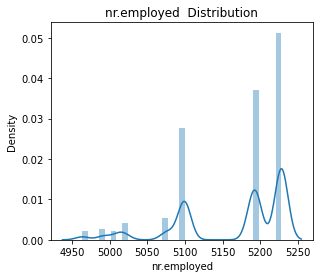

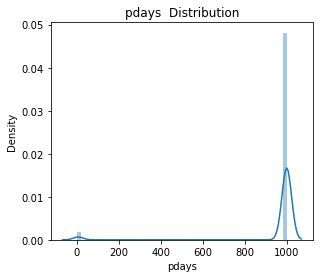

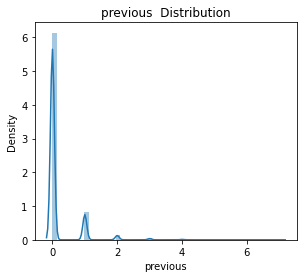

In [9]:
for column in feature_column:
    plt.figure(figsize=(16,4))
 
    plt.subplot(1,3,1)
    sns.distplot(df[column])
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.title(f'{column}  Distribution')

#### Box plot 

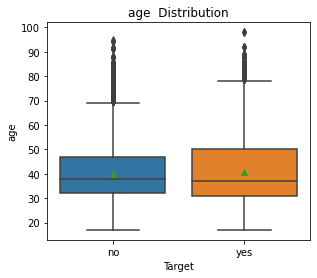

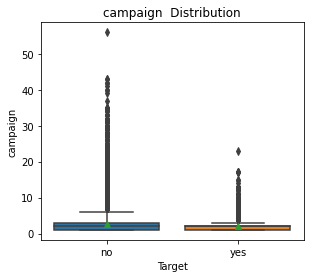

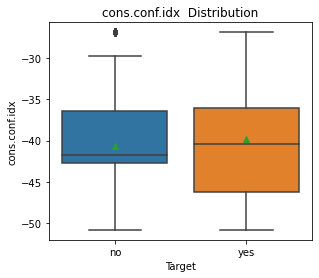

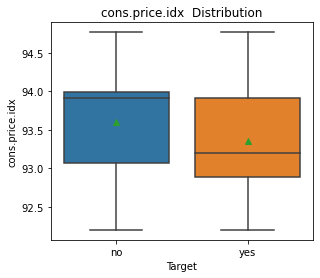

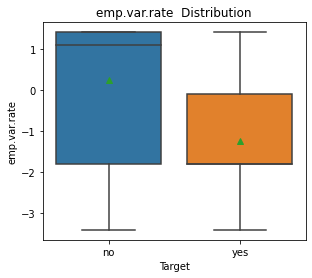

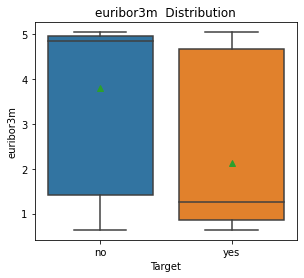

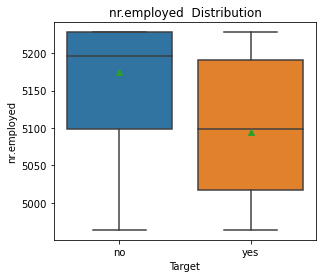

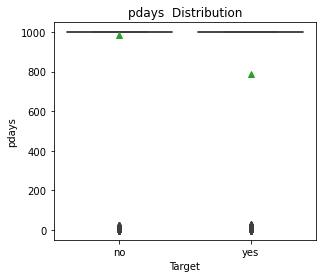

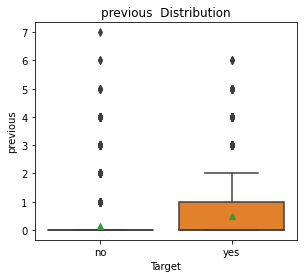

In [12]:
for column in feature_column:
    plt.figure(figsize=(16,4))
    plt.subplot(1,3,1)
    sns.boxplot(x='y', y=column, data =df, showmeans=True )
    plt.xlabel('Target')
    plt.ylabel(column)
    plt.title(f'{column}  Distribution')

#### we can drop some of the rows and columns by looking at the above graphs
1. we can remove the age values which are greater than 60
2. we can remove the compaign values which are greater than 10 by looking at the graph
3. we can drop the pdays column

In [10]:
df.drop(df[df.age>60].index, inplace=True)
df.drop(df[df.campaign>10].index, inplace=True)
df.drop("pdays",axis=1, inplace=True)

In [11]:
df.shape

(37647, 19)

### categorical features

In [12]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
df[categorical_features].head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


In [13]:
df.groupby('month')['y'].value_counts()

month  y  
apr    no      1923
       yes      470
aug    no      4824
       yes      576
dec    no        71
       yes       69
jul    no      5741
       yes      597
jun    no      4451
       yes      529
mar    yes      231
       no       221
may    no     12223
       yes      851
nov    no      3463
       yes      364
oct    no       317
       yes      259
sep    no       249
       yes      218
Name: y, dtype: int64

<AxesSubplot:xlabel='month', ylabel='count'>

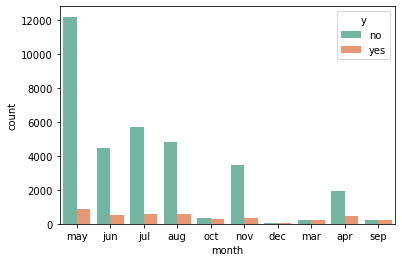

In [14]:
sns.countplot(x='month', hue='y', data=df,palette="Set2")

In the month of may there are maximum number of clients going for deposits and at the same time in the same month maximum number of clients are not going for the deposits. we can understand that month of may is very critical

In [15]:
df.groupby('day_of_week')['y'].value_counts()

day_of_week  y  
fri          no     6442
             yes     762
mon          no     7087
             yes     767
thu          no     6831
             yes     960
tue          no     6530
             yes     827
wed          no     6593
             yes     848
Name: y, dtype: int64

<AxesSubplot:xlabel='day_of_week', ylabel='count'>

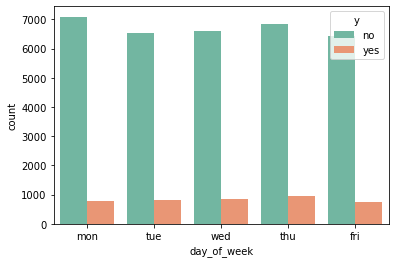

In [16]:
sns.countplot(x='day_of_week', hue='y', data=df,palette="Set2")

Monday the acceptance rate is low.
Thrusday the acceptance rate is high.
The acceptance rate does not depend much on the week day.

<AxesSubplot:xlabel='loan', ylabel='count'>

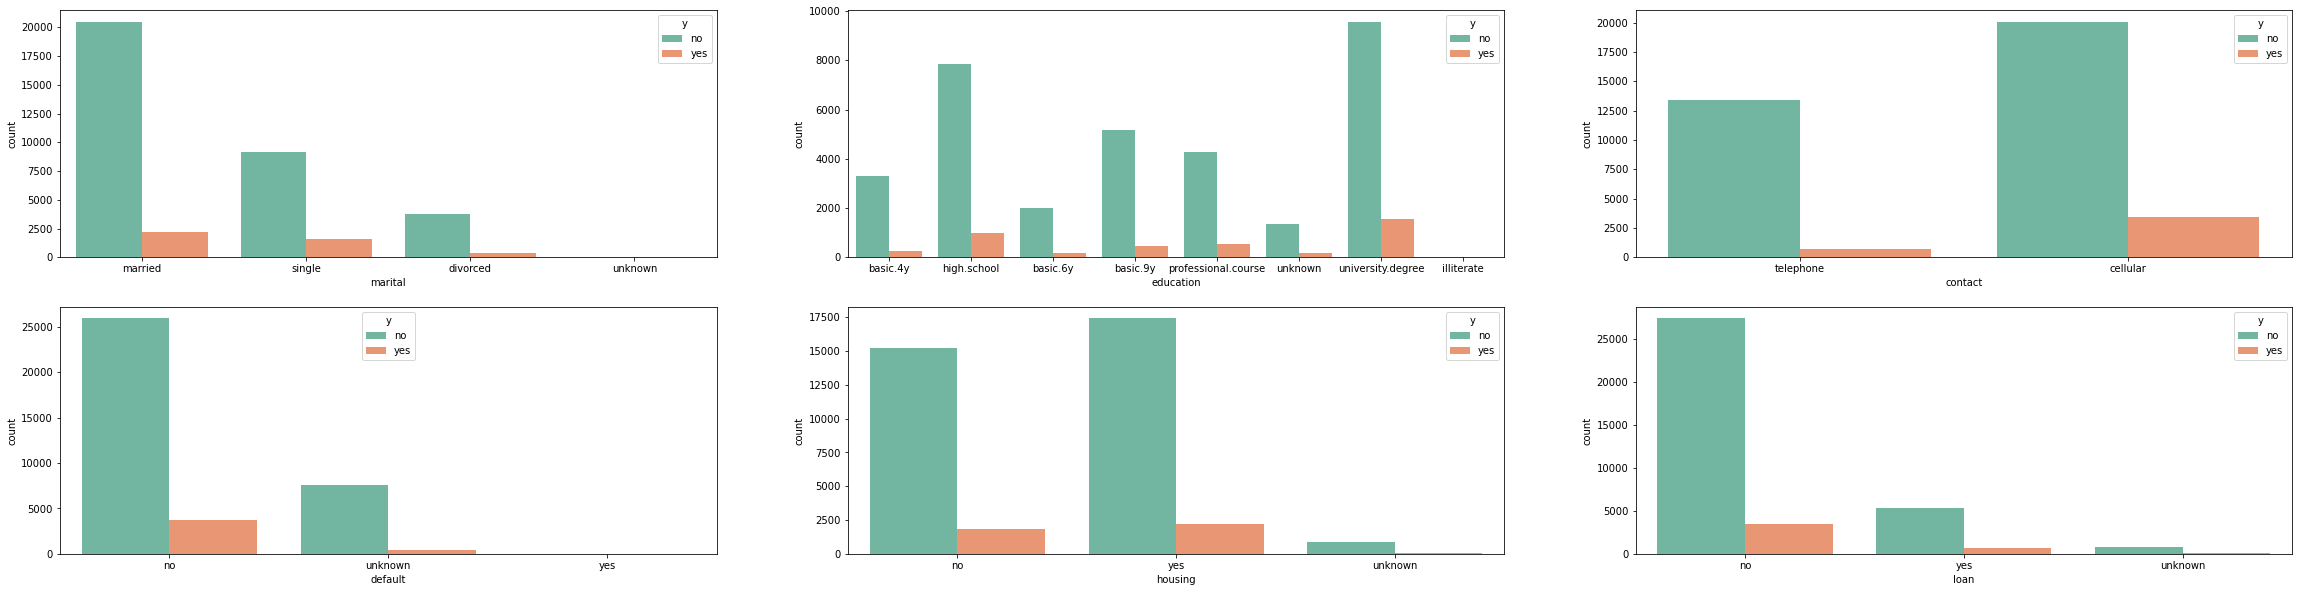

In [17]:
plt.figure(figsize=[40,10])

plt.subplot(231)
sns.countplot(x='marital', hue='y', data=df,palette="Set2")

plt.subplot(232)
sns.countplot(x='education', hue='y', data=df,palette="Set2")

plt.subplot(233)
sns.countplot(x='contact', hue='y', data=df,palette="Set2")

plt.subplot(234)
sns.countplot(x='default', hue='y', data=df,palette="Set2")

plt.subplot(235)
sns.countplot(x='housing', hue='y', data=df,palette="Set2")

plt.subplot(236)
sns.countplot(x='loan', hue='y', data=df,palette="Set2")

<AxesSubplot:xlabel='poutcome', ylabel='count'>

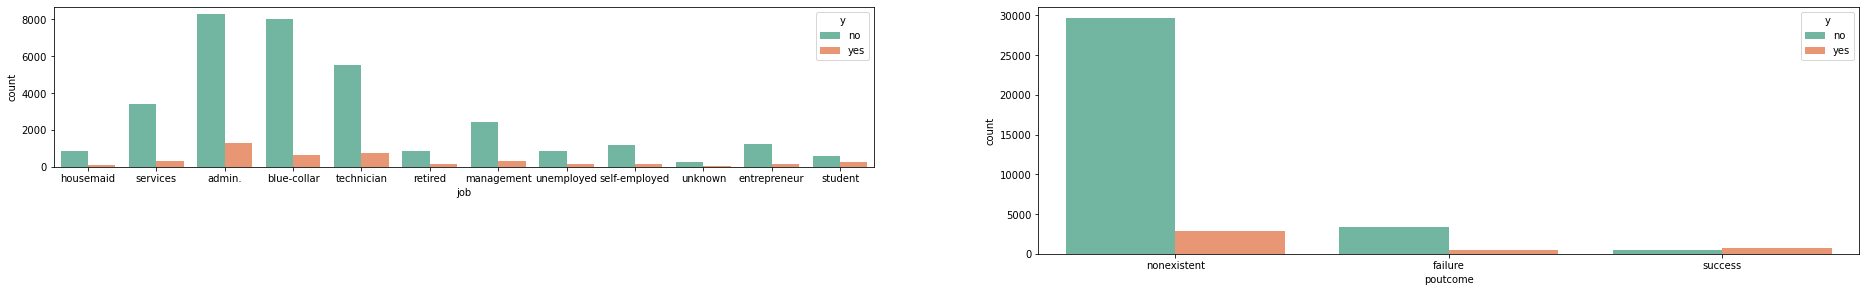

In [18]:
plt.figure(figsize=[50,10])

plt.subplot(331)
sns.countplot(x='job', hue='y', data=df,palette="Set2")

plt.subplot(232)
sns.countplot(x='poutcome', hue='y', data=df,palette="Set2")

Insights for categorical features:
1. people to get term deposits are most **married persons**
2. people with **university degree** will get more term deposits
3. people get term deposits by marketing people with only **cellular**
4. people do not prefer term deposit if by **default** have credit
5. most of the people do not prefer term deposit if they have **housing loan.**
6. people with admin and blue-collar jobs are most prefered to take term deposits.

### Numerical features

In [19]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  8


,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,1,0,1.1,93.994,-36.4,4.857,5191.0
1,57,1,0,1.1,93.994,-36.4,4.857,5191.0
2,37,1,0,1.1,93.994,-36.4,4.857,5191.0
3,40,1,0,1.1,93.994,-36.4,4.857,5191.0
4,56,1,0,1.1,93.994,-36.4,4.857,5191.0


#### Discreate features

In [20]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

df[discrete_feature].head()

Discrete Variables Count: 4


,campaign,previous,emp.var.rate,nr.employed
0,1,0,1.1,5191.0
1,1,0,1.1,5191.0
2,1,0,1.1,5191.0
3,1,0,1.1,5191.0
4,1,0,1.1,5191.0


<AxesSubplot:xlabel='previous', ylabel='count'>

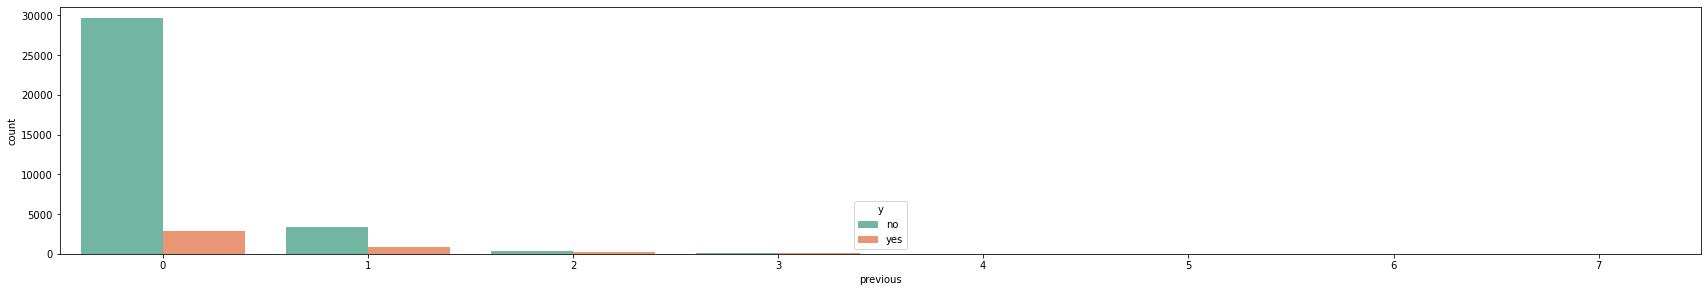

In [21]:
plt.figure(figsize=[100,10])

plt.subplot(231)
sns.countplot(x='previous', hue='y', data=df,palette="Set2")


#### Feature engineering

In [22]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


converting categorical variables to numerical format

In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['job']= le.fit_transform(df['job'])
df['marital']= le.fit_transform(df['marital'])
df['education']= le.fit_transform(df['education'])
df['default']= le.fit_transform(df['default'])
df['housing']=le.fit_transform(df['housing'])
df['loan']= le.fit_transform(df['loan'])
df['contact']= le.fit_transform(df['contact'])
df['month']=le.fit_transform(df['month'])
df['day_of_week']= le.fit_transform(df['day_of_week'])
df['poutcome']= le.fit_transform(df['poutcome'])
df['y']= le.fit_transform(df['y'])


In [24]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [25]:
for i in df.columns:
  print(f'{i} - {df[i].unique()}')
  print('\n')

age - [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 19 18 17]


job - [ 3  7  0  1  9  5  4 10  6 11  2  8]


marital - [1 2 0 3]


education - [0 3 1 2 5 7 6 4]


default - [0 1 2]


housing - [0 2 1]


loan - [0 2 1]


contact - [1 0]


month - [6 4 3 1 8 7 2 5 0 9]


day_of_week - [1 3 4 2 0]


campaign - [ 1  2  3  4  5  6  7  8  9 10]


previous - [0 1 2 3 4 5 6 7]


poutcome - [1 0 2]


emp.var.rate - [ 1.1  1.4 -0.1 -0.2 -1.8 -2.9 -3.4 -3.  -1.7 -1.1]


cons.price.idx - [93.994 94.465 93.918 93.444 93.798 93.2   92.756 92.843 93.075 92.893
 92.963 92.469 92.201 92.379 92.431 92.649 92.713 93.369 93.749 93.876
 94.055 94.215 94.027 94.199 94.601 94.767]


cons.conf.idx - [-36.4 -41.8 -42.7 -36.1 -40.4 -42.  -45.9 -50.  -47.1 -46.2 -40.8 -33.6
 -31.4 -29.8 -26.9 -30.1 -33.  -34.8 -34.6 -40.  -39.8 -40.3 -38.3 -37.5
 -49.5 -50.8]


euribor3m - [4.857 4.856 4.855 4.859 4.86  4.858 4.864 4.865 4.866 4.967 

In [26]:
df.corr().y.sort_values()

nr.employed      -0.333742
euribor3m        -0.288759
emp.var.rate     -0.281017
contact          -0.145667
cons.price.idx   -0.131504
default          -0.099457
campaign         -0.062771
age              -0.053192
month            -0.012323
loan             -0.009310
housing           0.010439
day_of_week       0.014188
job               0.020237
cons.conf.idx     0.042841
marital           0.065563
education         0.074951
poutcome          0.126434
previous          0.211998
y                 1.000000
Name: y, dtype: float64

#### Feature selection

In [27]:
X=df.iloc[:,:-1]
y=df['y']
X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,0,0,0,0,1,6,1,1,0,1,1.1,93.994,-36.4,4.857,5191.0
1,57,7,1,3,1,0,0,1,6,1,1,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,7,1,3,0,2,0,1,6,1,1,0,1,1.1,93.994,-36.4,4.857,5191.0
3,40,0,1,1,0,0,0,1,6,1,1,0,1,1.1,93.994,-36.4,4.857,5191.0
4,56,7,1,3,0,0,2,1,6,1,1,0,1,1.1,93.994,-36.4,4.857,5191.0


In [28]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

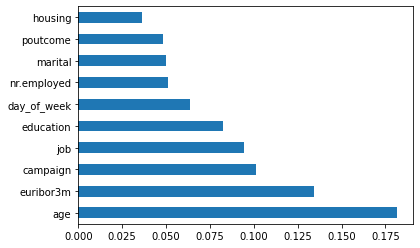

In [29]:
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(10).plot(kind='barh')
plt.show()

#### These are the top 10 independent features which has the highest influence with respect to the output variable.

<AxesSubplot:>

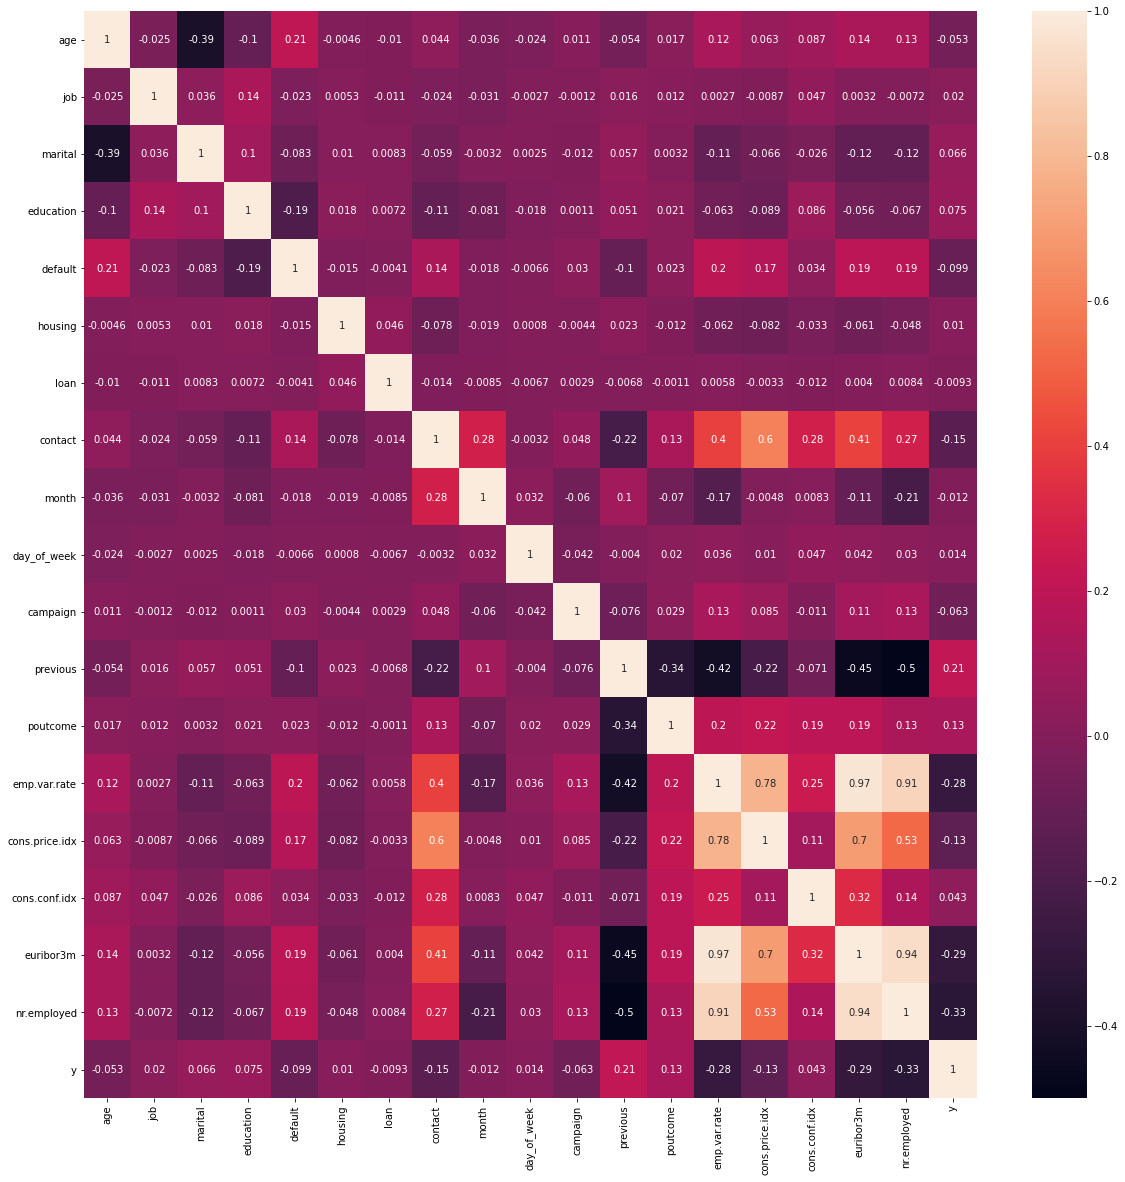

In [30]:
import seaborn as sns
corr=df.corr()
top_features=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(df[top_features].corr(),annot=True)

####  There is a high positive correlation between nr.employed and emp.var.rate (0.91)
#### There is a high positive correlation between euribor3m and emp.var.rate (0.97)
#### There is high postive correlation between cons.conf.idx and emp.var.rate(0.78)
#### There is high postive correlation between cons.conf.idx and contact(0.60)
#### There are also a few negative correlations between few features.

In [31]:
df["y"].value_counts()

0    33483
1     4164
Name: y, dtype: int64

#### Since the data is imbalanced we have to apply smote for making the data balance.

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=0)

In [33]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [35]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[6518  206]
 [ 598  208]]
0.8932270916334661
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      6724
           1       0.50      0.26      0.34       806

    accuracy                           0.89      7530
   macro avg       0.71      0.61      0.64      7530
weighted avg       0.87      0.89      0.88      7530



#### We cansee that accuracy is 89 % but if we observe the precision, recall and f1 score for "yes" class id very low.
#### we have to improve the accuracy of the model by balancing the dataset

In [51]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
from collections import Counter
Counter(y_train)

Counter({0: 26759, 1: 3358})

In [54]:
X_test.shape

(7530, 18)

In [38]:
!pip install imblearn
from imblearn.combine import SMOTETomek

In [55]:
os=SMOTETomek(0.80)
X_train_ns,y_train_ns=os.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

C:\Users\RAMESH MISALE\anaconda3\lib\site-packages\imblearn\utils\_validation.py:587: FutureWarning: Pass sampling_strategy=0.8 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


The number of classes before fit Counter({0: 26759, 1: 3358})
The number of classes after fit Counter({0: 26400, 1: 21048})


In [56]:
classifier.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [58]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))


[[6421  303]
 [ 524  282]]
0.8901726427622842


### Accuracy is around 89 %